# Exploratory Data Analysis. Netflix Dataset

![](https://images.stopgame.ru/blogs/2019/01/04/ENk8du4j.jpg)

Dataset source: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?resource=download

In [304]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

## EDA Tasks:
1. How many movies are in the dataset and list the titles?
2. How many show are in the dataset and list the titles?
3. Plot the distribution of movies/shows
4. How many movies/shows are released each year?
5. How many moveis was released in 1976?
6. How many shows was released in 1945?
7. Which Movies is the longest and which one is the shortest?
8. Which Show is the longest and which is the shortest?
9. List the unique genres in the dataset
10. plot imdb_score vs tmdb_score
11. plot tmdb_score vs tmdb_score_popularity

In [302]:
netflix = pd.read_csv('titles.csv')
netflix.head(5)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [11]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

1. How many movies are in the dataset?

In [37]:
movies = netflix[netflix['type'] == 'MOVIE'] 
print(f'Dataset containes {len(movies)} movies')

movies['title'][:10]

Dataset containes 3759 movies


1                         Taxi Driver
2     Monty Python and the Holy Grail
3                       Life of Brian
4                        The Exorcist
6                         Dirty Harry
7                        My Fair Lady
8                     The Blue Lagoon
9                    Bonnie and Clyde
10                  The Professionals
11               The Guns of Navarone
Name: title, dtype: object

2. How many show are in the dataset?

In [44]:
shows = netflix[netflix['type'] == 'SHOW'] 
print(f'Dataset containes {len(shows)} shows')

shows['title'][:10]

Dataset containes 2047 shows


0     Five Came Back: The Reference Films
5            Monty Python's Flying Circus
29       Monty Python's Fliegender Zirkus
47                               Seinfeld
55                           Knight Rider
57                       Thomas & Friends
60                      Saved by the Bell
64                       Wheel of Fortune
65                              Major Dad
66                            Fireman Sam
Name: title, dtype: object

3. Plot the distribution of movies/shows

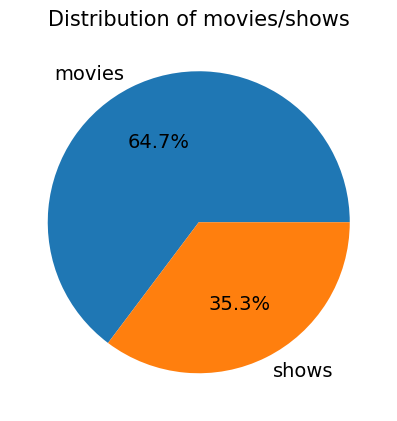

In [73]:
plt.figure(facecolor='white', figsize=(5,5), dpi=100)
plt.pie([len(movies), len(shows)], labels=['movies', 'shows'], textprops = {"fontsize":14}, autopct='%.1f%%')
plt.title('Distribution of movies/shows', fontdict= {"fontsize":15})
plt.show()

4. How many movies/shows are released each year?

In [95]:
shows_count_by_year = netflix[netflix['type'] == 'SHOW'].groupby('release_year')['id'].count()
movies_count_by_year = netflix[netflix['type'] == 'MOVIE'].groupby('release_year')['id'].count()

years = movies_count_by_year.index.append(shows_count_by_year.index)

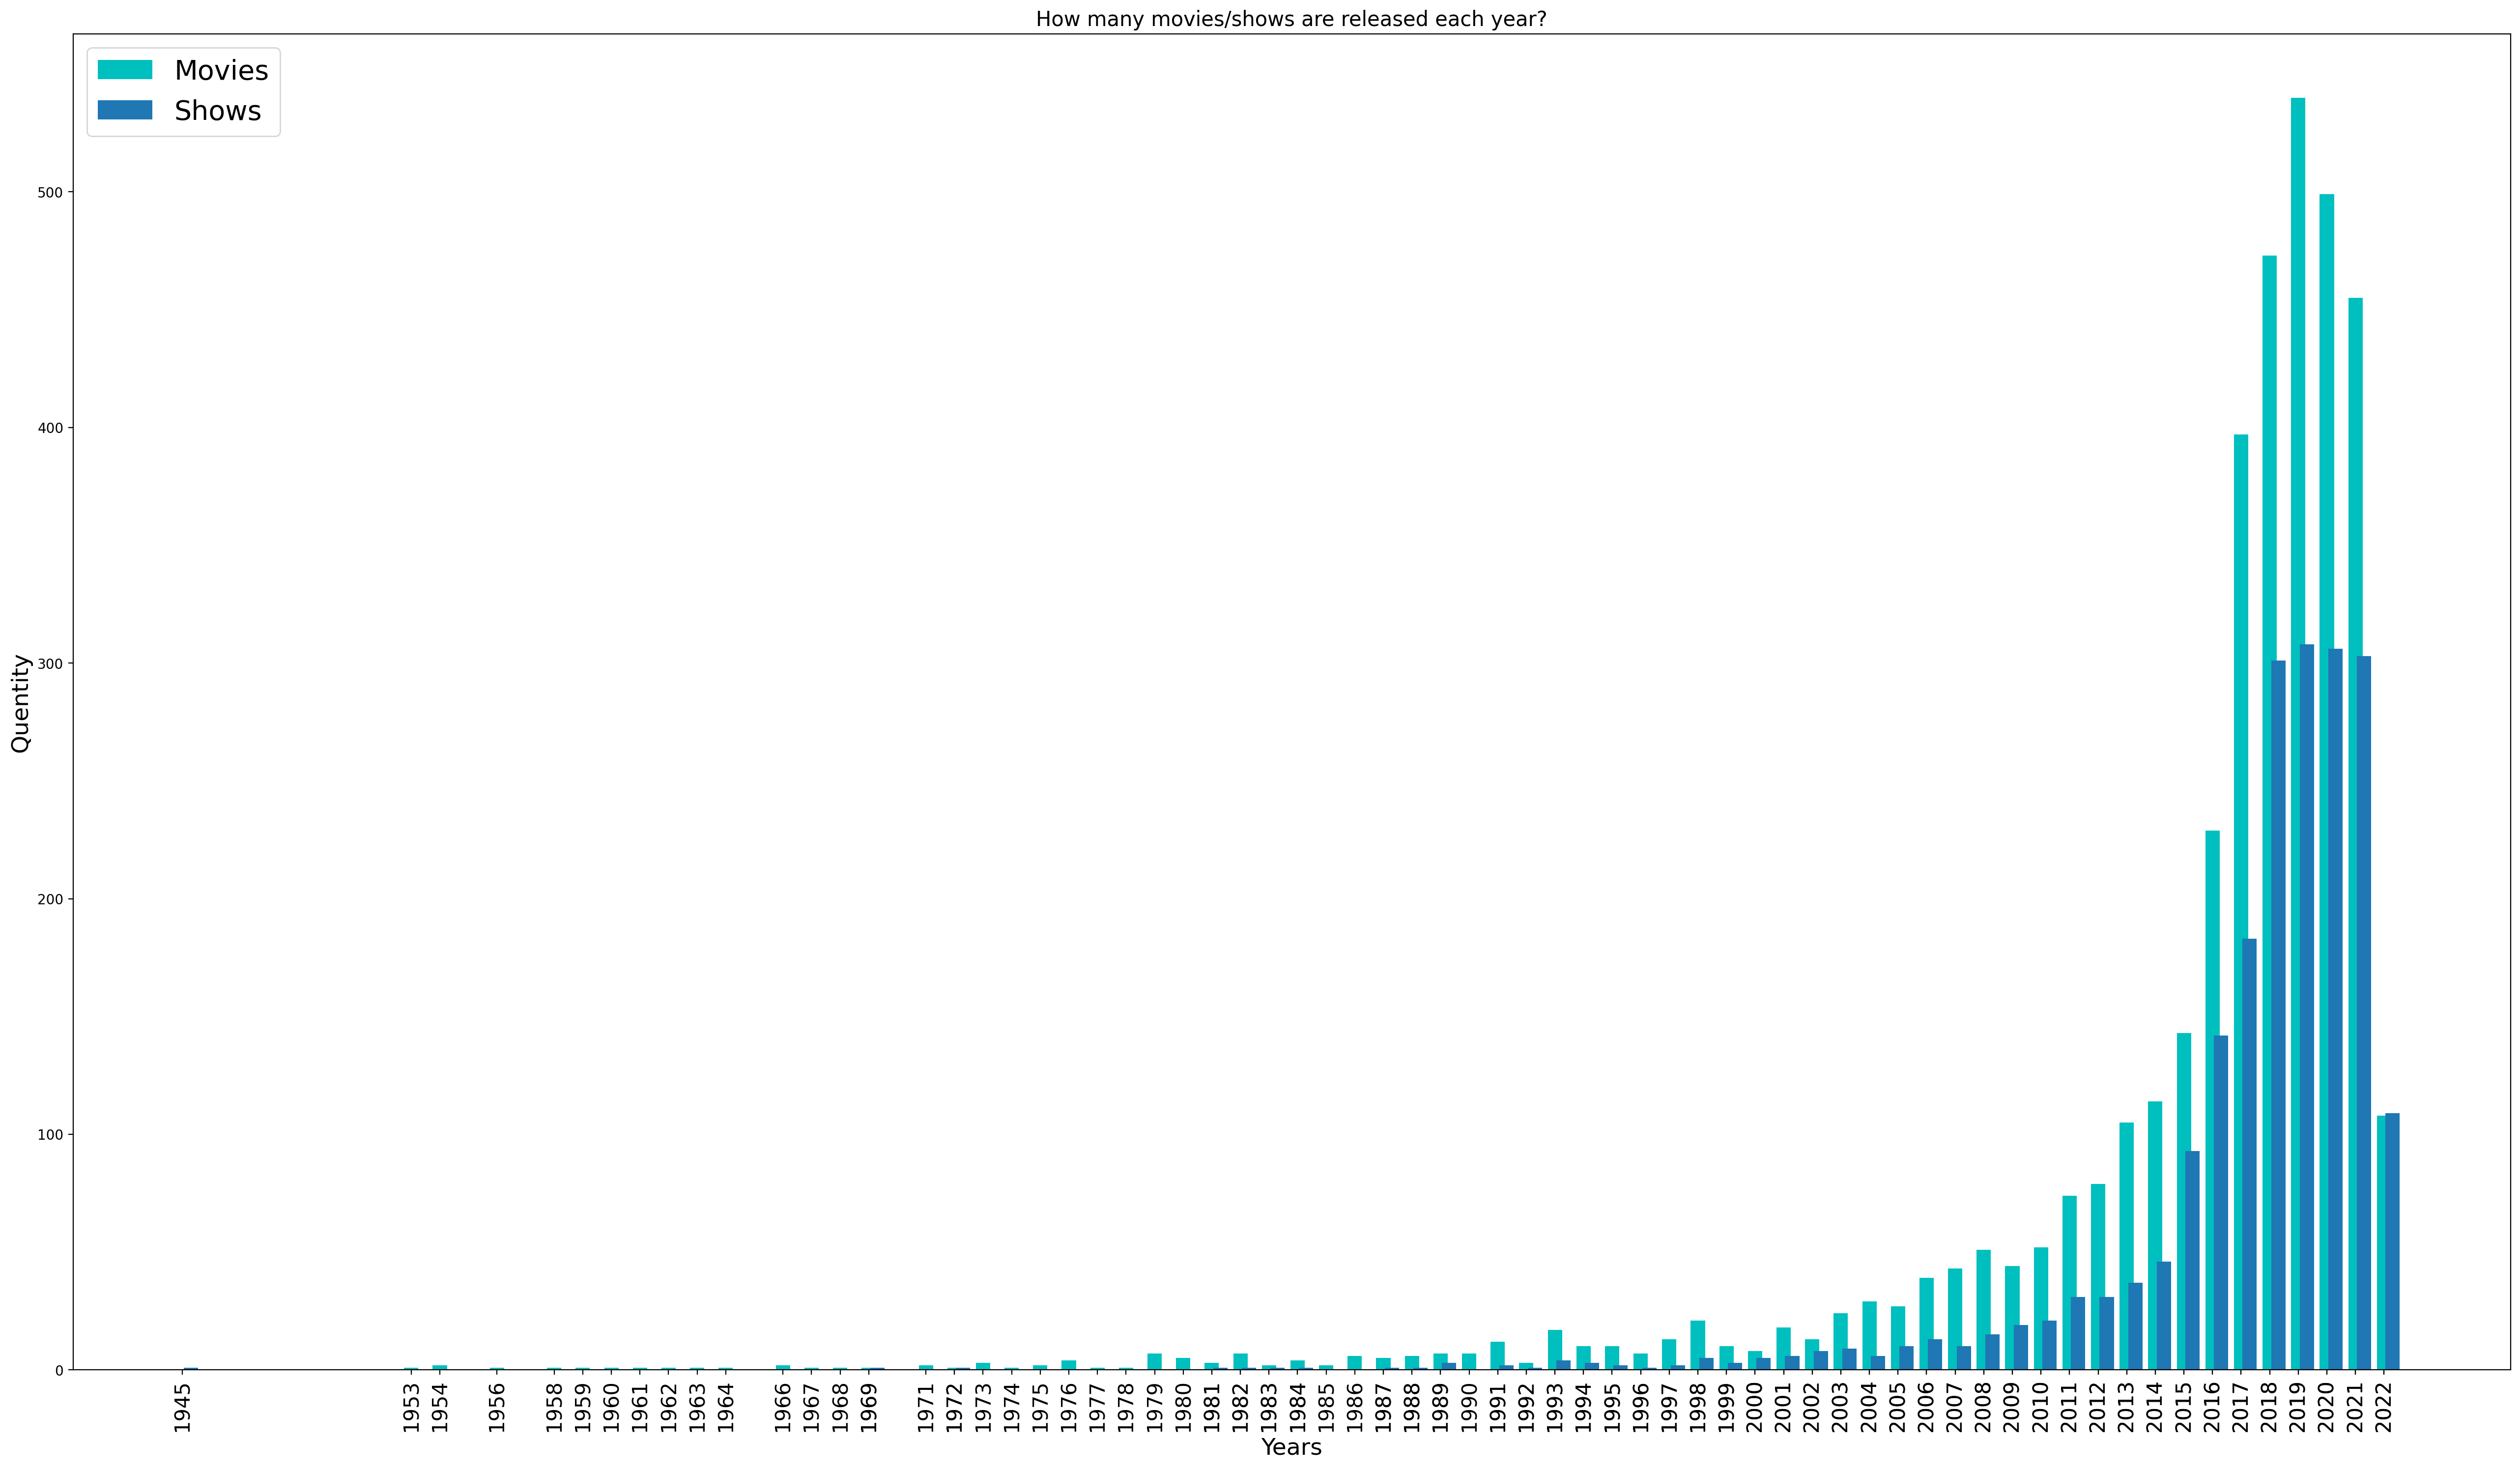

In [251]:
plt.figure(figsize=(32,18), dpi= 200)

plt.title('How many movies/shows are released each year?', fontsize=15)


plt.bar(movies_count_by_year.index, movies_count_by_year.values, label='Movies', width=0.5, color='c')
plt.bar(shows_count_by_year.index + 0.3,shows_count_by_year.values, label='Shows', width=0.5)

plt.xticks(years, rotation='vertical', fontsize=15)

plt.xlabel('Years', fontsize=17)
plt.ylabel('Quentity', fontsize=17)
plt.legend(loc='upper left', fontsize=20)

plt.show()

5. How many moveis was released in 1976?

In [165]:
movies_in_1976 = netflix[(netflix['type'] == 'MOVIE') & (netflix['release_year'] == 1976)] 
print(f'{len(movies_in_1976)} movies was released in 1976')

movies_in_1976

4 movies was released in 1976


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
30,tm90896,The Return of the Prodigal Son,MOVIE,"In this Andre Gide adaptation, an activist is ...",1976,NaN,124,"['drama', 'crime']","['DZ', 'EG']",NaN,tt0074168,7.2,768.0,3.768,5.4
33,tm85426,The Witness Who Didn't See Anything,MOVIE,"An Egyptian comedy play about an innocent, clu...",1976,NaN,217,['comedy'],['EG'],NaN,NaN,NaN,NaN,2.612,7.7
43,tm403346,Chadi Jawani Budhe Nu,MOVIE,A small-time businessman (B.S. Sood) reaches t...,1976,NaN,135,['romance'],['IN'],NaN,tt3290368,4.6,14.0,1.240,6.0


6. How many shows was released in 1945?

In [166]:
shows_in_1945 = netflix[(netflix['type'] == 'SHOW') & (netflix['release_year'] == 1945)] 
print(f'{len(shows_in_1945)} show was released in 1945')

shows_in_1945

1 show was released in 1945


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.6,NaN


7. Which Movies is the longest and which one is the shortest?

In [203]:
print(f"The shortest movie is {movies.sort_values('runtime')[:1]['title'].values} with runtime {movies.sort_values('runtime')[:1]['runtime'].values}")
print(f"The longest movie is {movies.sort_values('runtime')[-1:]['title'].values} with runtime {movies.sort_values('runtime')[-1:]['runtime'].values}")


The longest movie is ['Silent'] with runtime [3]
The longest movie is ['The School of Mischief'] with runtime [251]


8. Which Show is the longest and which is the shortest?

In [216]:
print(f"The shortest show is {shows[shows['runtime'] != 0].sort_values('runtime')[:1]['title'].values} with runtime {shows[shows['runtime'] != 0].sort_values('runtime')[:1]['runtime'].values}")
print(f"The longest show is {shows.sort_values('runtime')[-1:]['title'].values} with runtime {shows.sort_values('runtime')[-1:]['runtime'].values}")

The shortest show is ['Angry Birds Toons'] with runtime [2]
The longest show is ['A Lion in the House'] with runtime [225]


9. List the unique genres in the dataset

In [299]:
netflix['genres'].unique()[:10]

array(["['documentation']", "['crime', 'drama']", "['comedy', 'fantasy']",
       "['comedy']", "['horror']", "['comedy', 'european']",
       "['thriller', 'crime', 'action']",
       "['drama', 'music', 'romance', 'family']", "['romance', 'drama']",
       "['drama', 'crime', 'action']"], dtype=object)

In [297]:
films_genres = netflix['genres'].unique()

genres = []

for genre in films_genres: 
    str = genre.replace("'", '')
    str = str.replace('[', '')
    str = str.replace(']', '')
    genres.append(str.split(','))



list_of_genres = []

for i in range(0, len(genres)):
    if len(genres[i]) == 1:
        list_of_genres.append(genres[i][0])
    elif len(genres[i]) > 1:
        for j in range(0, len(genres[i])):
            list_of_genres.append(genres[i][j])

unique_genre = []

for genre in list_of_genres:
    genre = genre.replace(' ', '')
    if genre not in unique_genre and genre != '':
        unique_genre.append(genre)

unique_genre

['documentation',
 'crime',
 'drama',
 'comedy',
 'fantasy',
 'horror',
 'european',
 'thriller',
 'action',
 'music',
 'romance',
 'family',
 'western',
 'war',
 'animation',
 'history',
 'scifi',
 'reality',
 'sport']

10. plot imdb_score vs tmdb_score

In [321]:
plt.figure(figsize=(4,4),dpi=100)
px.scatter(netflix,x='imdb_score',y='tmdb_score',color='type', hover_name='title')

<Figure size 400x400 with 0 Axes>

11. plot tmdb_score vs tmdb_score_popularity

In [320]:
plt.figure(figsize=(4,4),dpi=100)
px.scatter(netflix,x='tmdb_score',y='tmdb_popularity',color='type', hover_name='title')

<Figure size 400x400 with 0 Axes>